In [1]:
import yfinance as yf

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import math

In [5]:
#import numpy as geek  

In [6]:
import matplotlib.pyplot as plt

In [7]:
import pandas_datareader as web

In [8]:
import statsmodels.api as sm

In [9]:
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

In [10]:
pd.set_option('mode.use_inf_as_na', True)

In [11]:
stock = 'twtr'

short_moving_average_span = 20
long_moving_average_span = 50
cutoff=0.50
invest = 100
years_of_data_to_process = 25
period = 15

In [12]:
currentDateTime = datetime.datetime.now()
date = currentDateTime.date()
#print (date)
year = date.strftime("%Y")
start_year =  int(year) - years_of_data_to_process
start = datetime.datetime(start_year, 1, 1)

In [13]:
data =  yf.download(stock, start=start)

[*********************100%***********************]  1 of 1 completed


In [14]:
#data = web.DataReader(stock, data_source='yahoo', start = start, end = '2008-7-14')

In [15]:
df = data["Close"].pct_change() * 100

In [16]:
df = df.rename("Today_Change_%")
df = df.reset_index()

In [17]:
df1 = pd.merge(data,df, on="Date")
#df1

In [18]:
#df1.dropna(inplace= True)
df1.insert(7,'Volume_Lag', None)
df1.Volume = df1.Volume.pct_change() * 100
#df1.Volume = df1.Volume *  geek.sign(df1.Volume.values)
df1['Volume_Lag'] = df1.Volume.shift(1).values


In [19]:
df1["Trend"] =  (df1["Close"] - df1["Low"])/ ((df1["High"] - df1["Low"]))

In [20]:
df1["Trend_Lag"] = df1["Trend"].shift(1)

In [21]:
df1['Close-Open'] =  df1['Close'] - df1['Open']
df1['Close-Open_Lag'] = df1['Close-Open'].shift(1)

In [22]:
df1['High-Low'] =  df1['High'] - df1['Low']
df1['High-Low_Lag'] = df1['High-Low'].shift(1)

In [23]:
df1 = sm.add_constant(df1)
df1["Up_Down"] = [1 if (i > 0) else 0 for i in df1["Today_Change_%"]]

In [24]:
df1.dropna(inplace= True)

In [25]:
df1['Short_MV_Avg_Span'] = df1['Close'].ewm(span=short_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [26]:
df1['Long_MV_Avg_Span'] = df1['Close'].ewm(span=long_moving_average_span, adjust=False).mean()
df1.dropna(inplace= True)
#df1

In [27]:
df1['Short_MV_Avg_Span-Long_MV_Avg_Span'] = df1.Short_MV_Avg_Span - df1.Long_MV_Avg_Span
df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span'].shift(1)
#df1

In [28]:
df1.dropna(inplace= True)
df1.tail(20)

,const,Date,Open,High,Low,Close,Adj Close,Volume,Volume_Lag,Today_Change_%,...,Trend_Lag,Close-Open,Close-Open_Lag,High-Low,High-Low_Lag,Up_Down,Short_MV_Avg_Span,Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span,Short_MV_Avg_Span-Long_MV_Avg_Span_Lag
1902,1.0,2021-06-01,58.200001,58.200001,56.270000,57.439999,57.439999,49.927451,-3.963177,-0.965520,...,0.232874,-0.760002,-0.200001,1.930000,0.730000,0,56.666149,59.262782,-2.596633,-2.752490
1903,1.0,2021-06-02,57.279999,57.639999,56.320000,57.160000,57.160000,-27.812874,49.927451,-0.487463,...,0.606217,-0.119999,-0.760002,1.320000,1.930000,0,56.713183,59.180320,-2.467137,-2.596633
1904,1.0,2021-06-03,56.959999,58.669998,55.830002,57.009998,57.009998,132.090490,-27.812874,-0.262424,...,0.636364,0.049999,-0.119999,2.839996,1.320000,0,56.741451,59.095209,-2.353758,-2.467137
1905,1.0,2021-06-04,57.410000,59.299999,57.320000,59.000000,59.000000,-44.254220,132.090490,3.490619,...,0.415492,1.590000,0.049999,1.980000,2.839996,1,56.956551,59.091476,-2.134925,-2.353758
1906,1.0,2021-06-07,58.619999,59.830002,57.720001,59.630001,59.630001,-14.013430,-44.254220,1.067798,...,0.848485,1.010002,1.590000,2.110001,1.980000,1,57.211165,59.112594,-1.901429,-2.134925
1907,1.0,2021-06-08,59.790001,60.090000,57.820000,58.810001,58.810001,21.201108,-14.013430,-1.375146,...,0.905213,-0.980000,1.010002,2.270000,2.110001,0,57.363435,59.100728,-1.737293,-1.901429
1908,1.0,2021-06-09,59.590000,61.049999,59.410000,59.709999,59.709999,26.546047,21.201108,1.530348,...,0.436124,0.119999,-0.980000,1.639999,2.270000,1,57.586917,59.124621,-1.537703,-1.737293
1909,1.0,2021-06-10,59.799999,60.380001,58.740002,60.299999,60.299999,-46.067089,26.546047,0.988109,...,0.182926,0.500000,0.119999,1.639999,1.639999,1,57.845306,59.170714,-1.325408,-1.537703
1910,1.0,2021-06-11,59.950001,60.630001,59.869999,60.500000,60.500000,-19.926584,-46.067089,0.331676,...,0.951218,0.549999,0.500000,0.760002,1.639999,1,58.098134,59.222843,-1.124709,-1.325408
1911,1.0,2021-06-14,60.849998,61.549999,60.450001,60.830002,60.830002,33.467996,-19.926584,0.545458,...,0.828946,-0.019997,0.549999,1.099998,0.760002,1,58.358312,59.285869,-0.927557,-1.124709


In [29]:
#X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Close-Open_Lag','High-Low_Lag','Volume_Lag']]

<function matplotlib.pyplot.close(fig=None)>

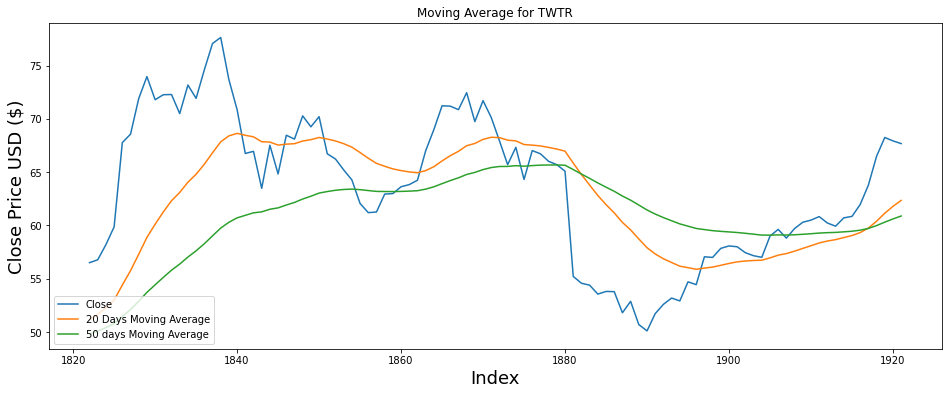

In [30]:
df1['Close'][-100:].plot(figsize=(16,6))
df1['Short_MV_Avg_Span'][-100:].plot(figsize=(16,6))
df1['Long_MV_Avg_Span'][-100:].plot(figsize=(16,6))
plt.xlabel('Index', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.legend(['Close', str(short_moving_average_span) + ' Days Moving Average', str(long_moving_average_span) + ' days Moving Average'], loc = 'lower left')
plt.title("Moving Average for " + stock.upper())
plt.show
plt.close

In [31]:
df1['Signal_Line'] = df1['Short_MV_Avg_Span-Long_MV_Avg_Span_Lag'].ewm(span = 12, adjust=False ).mean()
#column_list = list(df1)
#print (column_list)
#df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Up', 'Down', 'Signal_Line']]
#df1.info()

In [32]:
X = df1[['const','Trend_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Volume_Lag']]

In [33]:
y = df1["Up_Down"].values

In [34]:
model = sm.Logit(y,X)

In [35]:
result =  model.fit()

Optimization terminated successfully.
         Current function value: 0.690523
         Iterations 4


In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1919
Model:                          Logit   Df Residuals:                     1915
Method:                           MLE   Df Model:                            3
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                0.003106
Time:                        09:44:28   Log-Likelihood:                -1325.1
converged:                       True   LL-Null:                       -1329.2
Covariance Type:            nonrobust   LLR p-value:                   0.04099
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2630      0.090      2.918      0.004       0.086       0.440
Trend_Lag                                 -0.3886      0.156     -2.485      0.013      -0.695      -0.082
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0094      0.022      0.432      0.666      -0.033       0.052
Volume_Lag                                -0.0009      0.001     -1.327      0.184      -0.002       0.000
==========================================================================================================
"""

In [37]:
prediction = result.predict(X)

In [38]:
df1['Prediction_Caculated'] = pd.array(prediction)
df1['Prediction_indicator'] = pd.array([1 if i > cutoff else 0 for i in prediction])
#print (df1.iloc[-1,18],df1.iloc[-1,19],df1.iloc[-1,20])

In [39]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Up_Down', 'Prediction_indicator']])

In [40]:
y = df1["Up_Down"].values

In [41]:
def confusion_matrix(act,pred):
    predtrans = ['Up' if i > cutoff else 'Down' for i in pred]
    actuals = ['Up' if i > 0 else 'Down' for i in act]
    confusion_matrix = pd.crosstab(pd.Series(actuals),
                                   pd.Series(predtrans),
                                   rownames = ["Actual"],
                                   colnames = ["Predict"]
                                  )
    return confusion_matrix

In [42]:
confusion_matrix(y,prediction)

Predict,Down,Up
Actual,,
Down,350,580
Up,304,685


In [43]:
z = confusion_matrix(y,prediction)
try:
    print((z.loc['Down','Down'] + z.loc['Up','Up']) / len(df1))
except:
    pass

0.539343408025013


In [44]:
try:
    print( (z.loc['Down', 'Down']+ z.loc['Up','Up']) / (z.loc['Down', 'Down']+ z.loc['Up','Up'] + z.loc['Down','Up']) )
except:
    pass

0.6408668730650154


In [45]:
df1 = df1.assign(share=np.nan,money=np.nan)
#df1

In [46]:
diff_years = round((df1.iloc[-1,1] - df1.iloc[0,1])/np.timedelta64(1,'Y') + 0.5)   

In [47]:
#df1.info()
#column_list = list(df1)
#print (column_list)
df1=df1[['const', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Volume_Lag', 'Today_Change_%', 'Trend', 'Trend_Lag', 'Close-Open', 'Close-Open_Lag', 'High-Low', 'High-Low_Lag', 'Up_Down', 'Short_MV_Avg_Span', 'Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag', 'Prediction_Caculated', 'Prediction_indicator', 'share', 'money', 'Signal_Line']]
#df1.info()

In [48]:
#Simulate Investment transaction buy on opening when predict UP and sell daily average when predict DOWN

def buy_sell(open_price, sell_price,prediction, money, share):
    if prediction == 1 and money != 0:
        share =  money / open_price
        money = 0
    elif prediction == 0 and share != 0:
        money = share * sell_price
        share = 0
    else: pass
    return [money, share]
money = invest
share = 0
for i in range(len(df1)):
    [money, share] = buy_sell(df1.iloc[i,2],(df1.iloc[i,3]+df1.iloc[i,4])/2,df1.iloc[i,22], money, share)
    df1.iloc[i,23] = share
    df1.iloc[i,24] = money

In [49]:
#df1.info()

In [50]:
df1 = df1.assign(Up=np.nan,Down=np.nan)
#df1.info()

In [51]:
for i in range(len(df1)):
    if df1.iloc[i,9] <= 0:
        df1.iloc[i,26] = 0
        df1.iloc[i,27] = df1.iloc[i,9]
    else:
        df1.iloc[i,27] = 0
        df1.iloc[i,26] = df1.iloc[i,9]

AVG_Gain = df1.Up.ewm(span=period, adjust=False).mean()
AVG_Loss = df1.Down.ewm(span=period, adjust=False).mean().abs()

In [52]:
RS = AVG_Gain /AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))
df1['RSI'] = RSI
df1['RSI_Lag'] = df1['RSI'].shift(1)

<function matplotlib.pyplot.close(fig=None)>

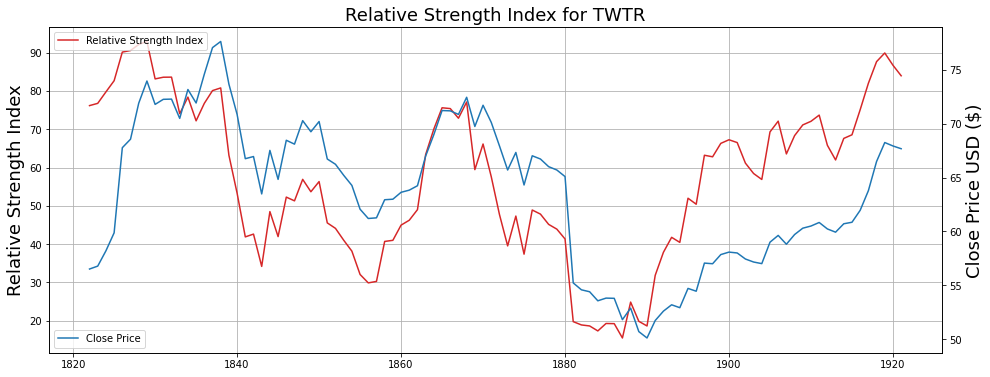

In [53]:
fig, ax1 = plt.subplots()
ax2 =  ax1.twinx()
df1['RSI'][-100:].plot(x = 'Index', color='tab:red', figsize=(16,6), label = 'Relative Strength Index',ax = ax1)
df1['Close'][-100:].plot(x = 'Index', y = 'Close',color = 'tab:blue', figsize=(16,6),  label = 'Close Price',ax = ax2)
#df1['Close'][-100:].plot(figsize=(16,6))
ax1.set_ylabel('Relative Strength Index', fontsize = 18)
ax2.set_ylabel('Close Price USD ($)', fontsize = 18)
#df1.xlabel('Index', fontsize=18)
#df1.ylabel('Relative Strength Index', fontsize =18)
ax1.grid()
ax1.set_title("Relative Strength Index for " + stock.upper(), fontsize = 18)
ax1.legend(loc=2)
ax2.legend(loc=3)
plt.show
plt.close

In [54]:
df1.dropna(inplace= True)
X = df1[['const','Trend_Lag', 'RSI_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Volume_Lag']]
y = df1["Up_Down"].values
model = sm.Logit(y,X)
result =  model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.690411
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 1918
Model:                          Logit   Df Residuals:                     1913
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                0.003244
Time:                        09:44:30   Log-Likelihood:                -1324.2
converged:                       True   LL-Null:                       -1328.5
Covariance Type:            nonrobust   LLR p-value:                   0.07134
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.1685      0.159      1.057      0.291      -0.144       0.481
Trend_Lag                                 -0.4222      0.166     -2.542      0.011      -0.748      -0.097
RSI_Lag                                    0.0022      0.003      0.706      0.480      -0.004       0.008
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0019      0.024      0.080      0.936      -0.045       0.049
Volume_Lag                                -0.0009      0.001     -1.365      0.172      -0.002       0.000
==========================================================================================================
"""

In [55]:
print("\nIf ${:,.0f} was invested in [ {} ], and Just Hold and Not Trade for {:2d} years, the ROI = ${:,.0f}".format( invest, stock.upper(), diff_years, invest/data.iloc[0, 0] * data.iloc[-1,0]))


If $100 was invested in [ TWTR ], and Just Hold and Not Trade for  8 years, the ROI = $151


In [56]:
print ("\nIf ${:,.0f} was invested {:2d} years ago, buy and sell according this script\'s recommandation, the ROI = ${:,.0f}".format(invest, diff_years, (money + (share * df1.iloc[-1,5]))))


If $100 was invested  8 years ago, buy and sell according this script's recommandation, the ROI = $418


In [57]:
df1_summary=df1[['Date', 'Up_Down','Prediction_indicator']].copy()
df1_summary['Stock Market Performance'] = df1_summary['Up_Down'].apply(lambda x: 'Up' if x > 0 else 'Down')
df1_summary['Scribe Predection'] = df1_summary['Prediction_indicator'].apply(lambda x: 'Up' if x > 0 else 'Down')
print (df1_summary[['Date','Stock Market Performance','Scribe Predection']].tail(15))

           Date Stock Market Performance Scribe Predection
1907 2021-06-08                     Down              Down
1908 2021-06-09                       Up                Up
1909 2021-06-10                       Up                Up
1910 2021-06-11                       Up              Down
1911 2021-06-14                       Up              Down
1912 2021-06-15                     Down                Up
1913 2021-06-16                     Down                Up
1914 2021-06-17                       Up                Up
1915 2021-06-18                       Up                Up
1916 2021-06-21                       Up              Down
1917 2021-06-22                       Up              Down
1918 2021-06-23                       Up              Down
1919 2021-06-24                       Up              Down
1920 2021-06-25                     Down              Down
1921 2021-06-28                     Down                Up


In [58]:
#print(df1.loc[[i for i in range(len(df1)-20, len(df1)+2)],['Date','Close','Trend_Lag', 'Short_MV_Avg_Span-Long_MV_Avg_Span_Lag']])

In [59]:
print ("\nToday [ %s ] actually went up," %stock.upper(), end = ' ') if (df1.iloc[-1,16] == 1) else print ("\nToday [ %s ] actually went down," %stock.upper(), end = " ")
print ("--- base on yesterday\'s data, ", end = '')
print ("We Predication [ %s ] should be going up." %stock.upper()) if (df1.iloc[-1,22] == 1) else print ("We Predicae [ %s ] should be going down." %stock.upper())
print ("\n=========> Actual and Predication MATCH <=========") if (df1.iloc[-1,16] == df1.iloc[-1,22]) else print("\n=========> Actual and Predication DO NOT match <=========")


Today [ TWTR ] actually went down, --- base on yesterday's data, We Predication [ TWTR ] should be going up.

=========> Actual and Predication DO NOT match <=========


In [60]:
x_tran= df1[df1.Date.dt.year < 2021][['const','Trend_Lag', 'RSI_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Volume_Lag']]
y_train=df1[df1.Date.dt.year < 2021]["Up_Down"]
x_test= df1[df1.Date.dt.year >= 2021][['const','Trend_Lag', 'RSI_Lag','Short_MV_Avg_Span-Long_MV_Avg_Span_Lag','Volume_Lag']]
y_test= df1[df1.Date.dt.year >= 2021]["Up_Down"]

In [61]:
model = sm.Logit(y_train,x_tran)
result=model.fit()

Optimization terminated successfully.
         Current function value: 0.690492
         Iterations 4


In [62]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Up_Down   No. Observations:                 1796
Model:                          Logit   Df Residuals:                     1791
Method:                           MLE   Df Model:                            4
Date:                Mon, 28 Jun 2021   Pseudo R-squ.:                0.003131
Time:                        09:44:30   Log-Likelihood:                -1240.1
converged:                       True   LL-Null:                       -1244.0
Covariance Type:            nonrobust   LLR p-value:                   0.09955
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2795      0.170      1.645      0.100      -0.053       0.613
Trend_Lag                                 -0.3848      0.172     -2.234      0.026      -0.722      -0.047
RSI_Lag                                   -0.0004      0.003     -0.112      0.910      -0.007       0.006
Short_MV_Avg_Span-Long_MV_Avg_Span_Lag     0.0214      0.027      0.793      0.428      -0.032       0.074
Volume_Lag                                -0.0008      0.001     -1.130      0.259      -0.002       0.001
==========================================================================================================
"""

In [63]:
#print(result.summary().as_csv())

In [64]:
summary_list=result.summary().as_csv().split(",")

In [65]:
#print(summary_list)

In [66]:
#print(summary_list[37:39])

In [67]:
prediction = result.predict(x_test)
confusion_matrix(y_test, prediction)

Predict,Down,Up
Actual,,
Down,19,40
Up,21,42


In [68]:
z = confusion_matrix(y_test,prediction)

In [69]:
try:
    print ("\n=========> Prediction Accuracy Rate: %.4f <=========\n"  %((z.loc['Down','Down'] + z.loc['Up','Up']) / len(x_test)))
except:
    print ("\n=========> Predication effectiveness is not avairable <=========\n" )


=========> Prediction Accuracy Rate: 0.5000 <=========



In [70]:
#df1.info()

In [71]:
prediction = result.predict(x_test)
now_up_down  = result.predict([1.0, df1.iloc[-1, 10], df1.iloc[-1, 28], df1.iloc[-1, 19], df1.iloc[-1, 7]])
print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("[ %s ] will go up! <=========" %stock.upper()) if now_up_down > cutoff else print ("[ %s ] will go down! <=========" %stock.upper()) 


=========> Current trend = 0.5444,   [ TWTR ] will go up! <=========


In [72]:
#print ("\n=========> Current trend = %.4f,  " %now_up_down, end=' ')
print ("\n ============> %s Days over %s Days Moving Average Indicator \n ============> %.4f....%.4f....%.4f....%.4f....%.4f....<=============" %(short_moving_average_span, long_moving_average_span, df1.iloc[-5,19], df1.iloc[-4,19], df1.iloc[-3,19], df1.iloc[-2,19],df1.iloc[-1,19]))
if df1.iloc[-1,19] * df1.iloc[-2,19] < 0:
    print ("\n ============> Warning, It Is the Time to Sell [ %s ] <=========" %stock.upper()) if df1.iloc[-1,19] < 0 else print ("\n ============> It Is the Time to Buy [ %s ] ! <=========" %stock.upper())
else:
    print ("\n ============> No Trading Waring at this time! <=============")


 ============> 20 Days over 50 Days Moving Average Indicator 
 ============> 0.0327....0.4088....0.8328....1.1804....1.4638....<=============

 ============> No Trading Waring at this time! <=============


In [73]:
#df1.to_csv('fb.csv', index = False)